In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib.patches import FancyArrowPatch
from highlight_text import fig_text, ax_text

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/japan-population.csv"
df = pd.read_csv(url)
df.head()

,date,pop_var,flag
0,1952,1238290.0,False
1,1953,1135376.0,False
2,1954,1035879.0,False
3,1955,997262.0,False
4,1956,931279.0,False


In [13]:
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
   if 'librebaskerville' in fontpath.lower() or 'lato' in fontpath.lower():
      print(fontpath)

/Users/josephbarbier/Library/Fonts/LibreBaskerville-Regular.ttf
/Users/josephbarbier/Library/Fonts/LibreBaskerville-Bold.ttf
/Users/josephbarbier/Library/Fonts/Lato-Bold.ttf


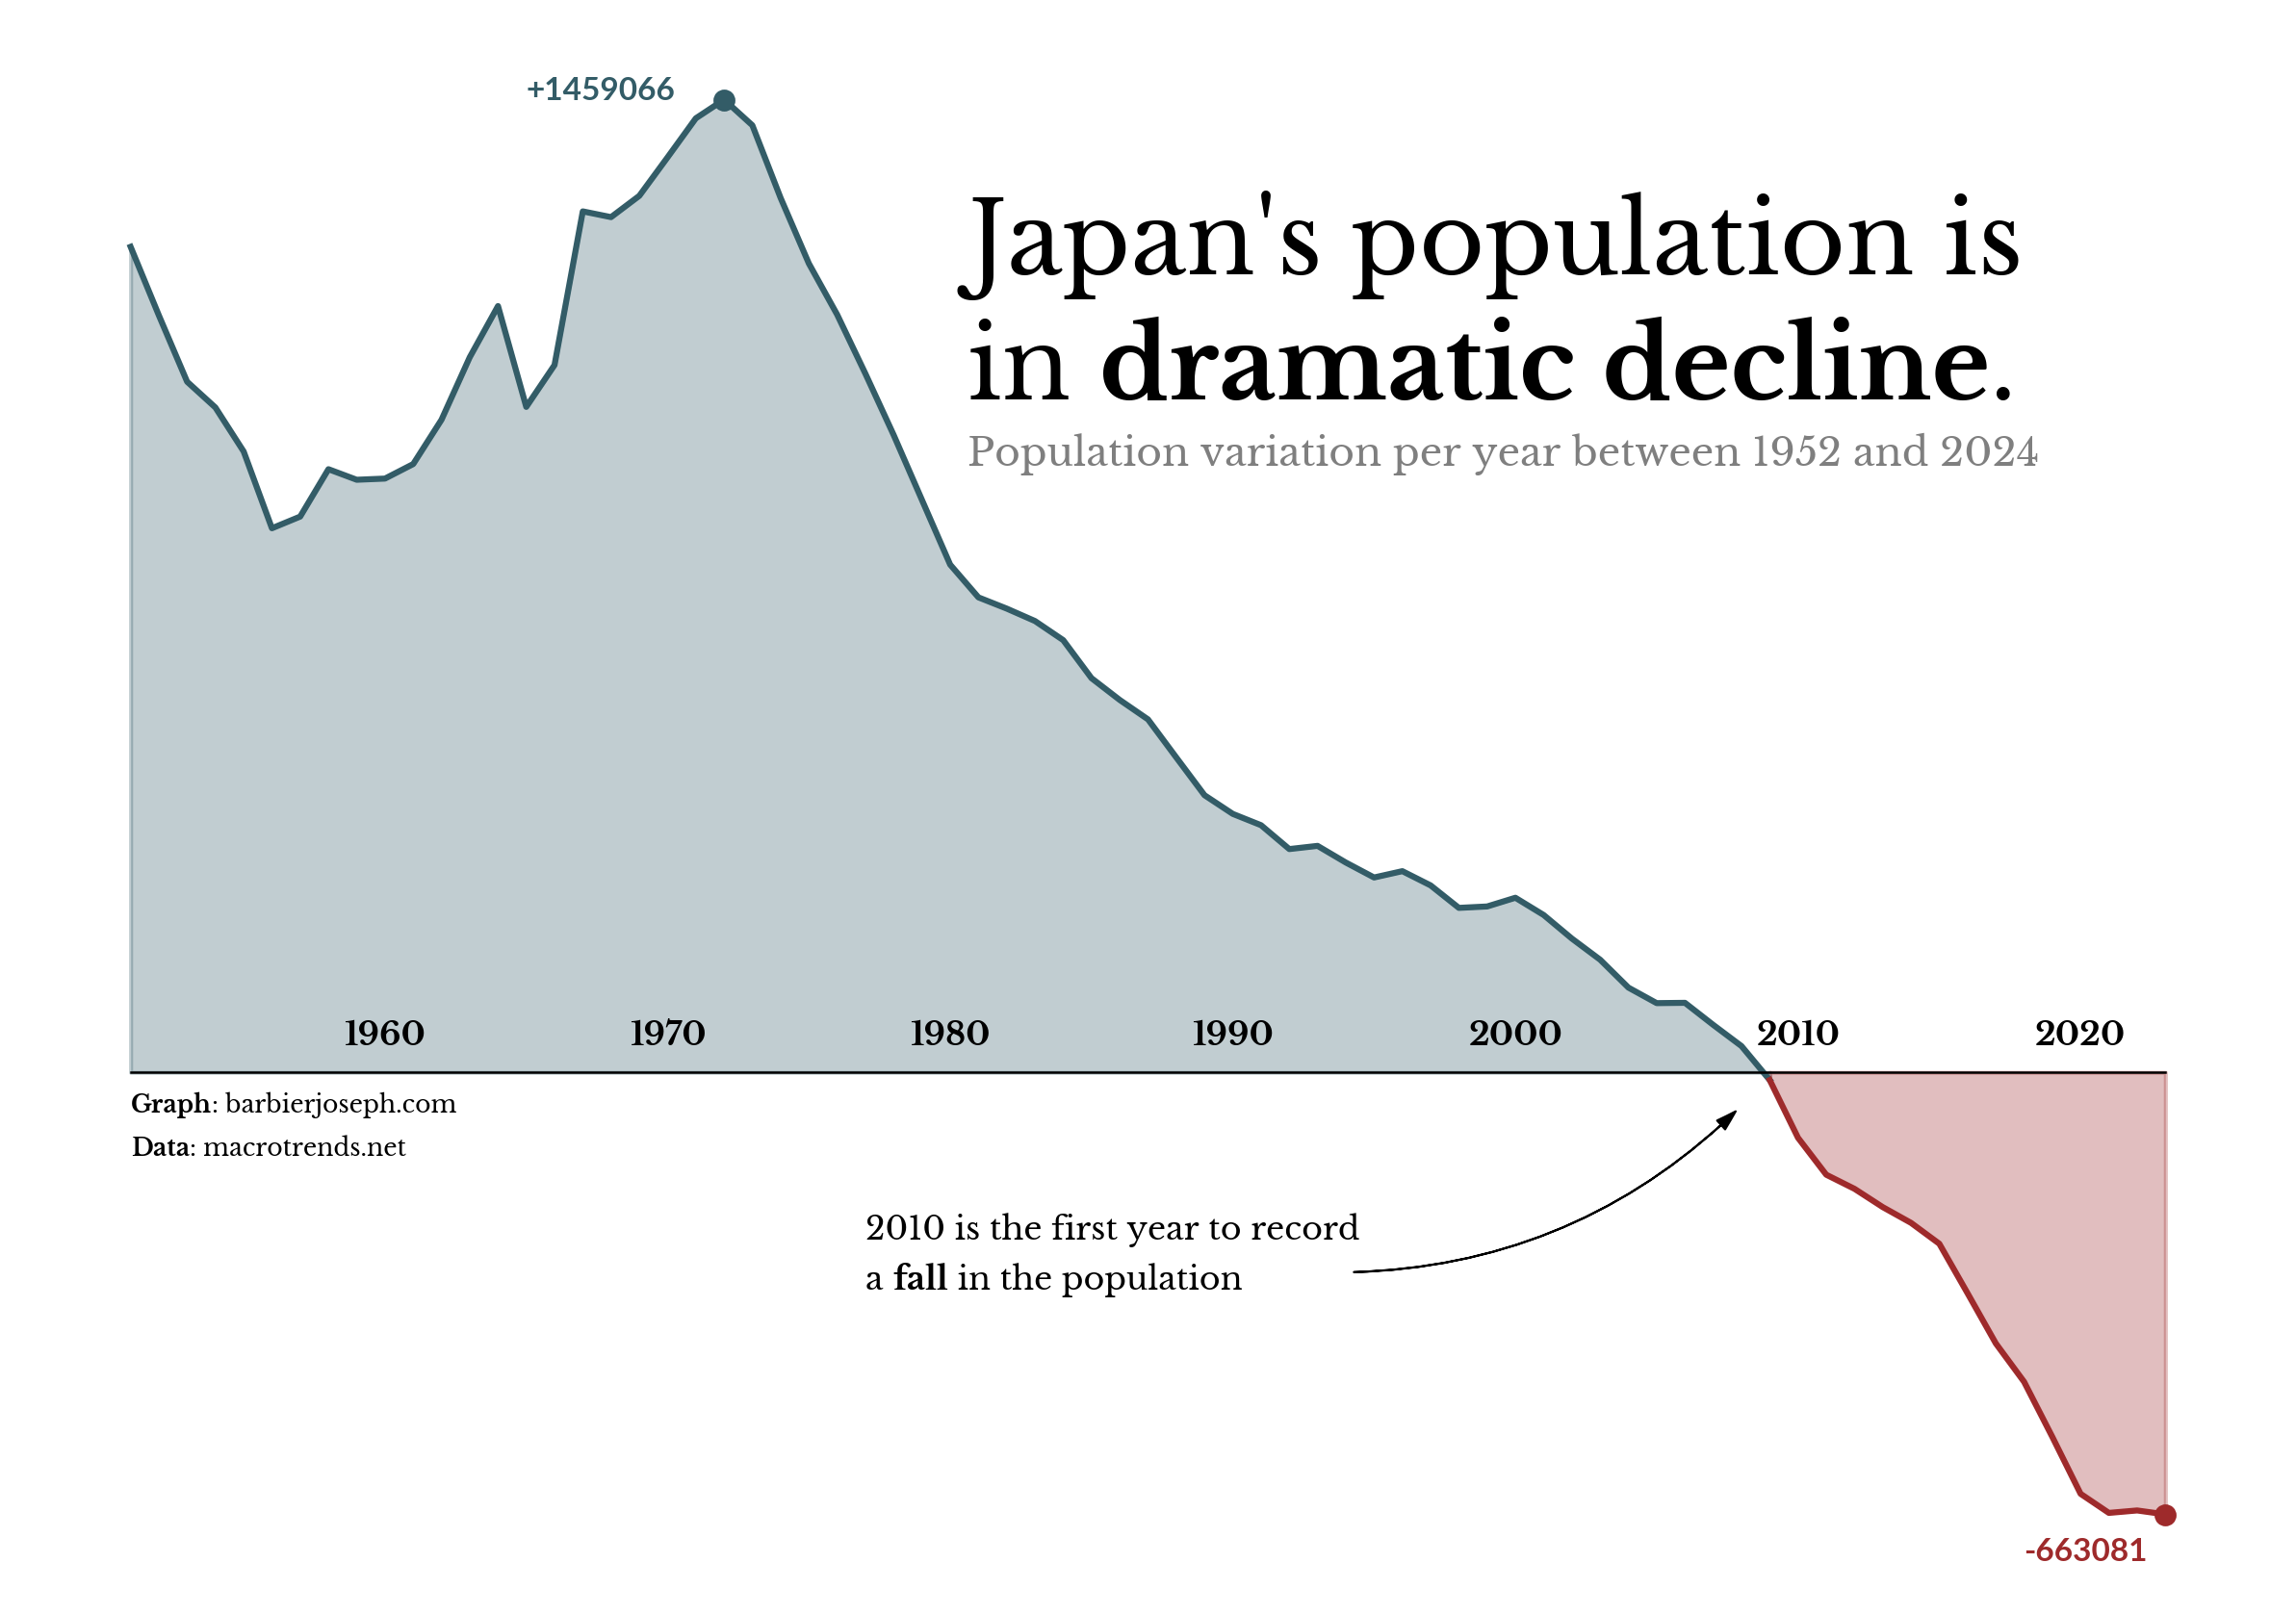

In [9]:
# style parameters
path_to_fonts = "/Users/josephbarbier/Library/Fonts"
font = FontProperties(fname=f"{path_to_fonts}/LibreBaskerville-Regular.ttf")
boldfont = FontProperties(fname=f"{path_to_fonts}/LibreBaskerville-Bold.ttf")
digit_font = FontProperties(fname=f"{path_to_fonts}/Lato-Bold.ttf")

fig, ax = plt.subplots(dpi=300, figsize=(10,7))
ax.set_axis_off()

# before
color = '#335c67'
year_index = df[df['flag']].date.values[0]
before_df = df[df['date']<=year_index]
ax.plot(before_df['date'], before_df['pop_var'], color=color)
ax.fill_between(before_df['date'], before_df['pop_var'], alpha=0.3, color=color)
max_year = df[df['pop_var']==df['pop_var'].max()].date.values[0]
max_value = df[df['pop_var']==df['pop_var'].max()].pop_var.values[0]
ax.scatter(x=max_year, y=max_value, color=color, s=20)
ax.text(x=max_year-7, y=max_value, s=f'+{max_value:.0f}', font=digit_font, size=8, color=color)

# after
color = '#9e2a2b'
after_df = df[df['date']>=year_index]
ax.plot(after_df['date'], after_df['pop_var'], color=color)
ax.fill_between(after_df['date'], after_df['pop_var'], alpha=0.3, color=color)
min_year = df[df['pop_var']==df['pop_var'].min()].date.values[0]
min_value = df[df['pop_var']==df['pop_var'].min()].pop_var.values[0]
ax.scatter(x=min_year, y=min_value, color=color, s=20)
ax.text(x=min_year-5, y=min_value-70000, s=f'{min_value:.0f}', font=digit_font, size=8, color=color)

ax.plot([1952, 2024], [0,0], color='black', linewidth=0.6)
year_range = range(1960, 2021, 10)
for year in year_range:
   ax.text(x=year+1, y=40000, s=f'{year}', font=boldfont, size=8, ha='center')

s = "Japan's population is\nin <dramatic decline>."
fig_text(x=0.45, y=0.8, s=s, font=font, highlight_textprops=[{'font':boldfont}], fontsize=25, ha='left', va='top')

s = "Population variation per year between 1952 and 2024"
fig_text(x=0.45, y=0.68, s=s, font=font, fontsize=9.8, ha='left', va='top', alpha=0.5)

s = "<Graph>: barbierjoseph.com\n<Data>: macrotrends.net"
ax_text(x=1952, y=-30000, s=s, font=font, fontsize=6, ha='left', highlight_textprops=[{'font':boldfont}]*2)

s = "2010 is the first year to record\na <fall> in the population"
ax_text(x=1978, y=-210000, s=s, font=font, fontsize=8, ha='left', highlight_textprops=[{'font':boldfont}])

arrow_style = "Simple, tail_width=0.05, head_width=3, head_length=5"
connection_style = "arc3,rad=.2"
arrow_properties = {
   "arrowstyle": arrow_style,
   "color": "black",
   "linewidth": 0.5
}
arrow = FancyArrowPatch(
   (1995, -300000),
   (2009, -50000),
   connectionstyle=connection_style,
   **arrow_properties
)
ax.add_patch(arrow)

plt.show()